<a href="https://colab.research.google.com/github/Okocha76/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd

In [2]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

sales_data = {'sales': sales}

sales_df = pd.DataFrame(sales_data)

mean_sales = sum(sales)/len(sales)
print("Mean sales:", mean_sales)

sales_df['distance'] = sales_df.sales-mean_sales
sales_df['squared_dis'] = sales_df.distance**2

observations = len(sales_df)
var_sales = sales_df.squared_dis.sum()/(observations-1)

print("Variance sales:", var_sales)

sd_sales = var_sales**.5
print("Standard deviation sales:", sd_sales)

Mean sales: 3052.714285714286
Variance sales: 214387.90476190473
Standard deviation sales: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [3]:
customers = [127, 80, 105, 92, 120, 115, 93]
sales_df['customers'] = customers
sales_df.head(7)

,sales,distance,squared_dis,customers
0,3505,452.285714,204562.367347,127
1,2400,-652.714286,426035.938776,80
2,3027,-25.714286,661.224490,105
3,2798,-254.714286,64879.367347,92
4,3700,647.285714,418978.795918,120
5,3250,197.285714,38921.653061,115
6,2689,-363.714286,132288.081633,93


In [4]:
sales_customers = sales_df.drop(['distance', 'squared_dis'], axis=1)
sal_cus_matrix = sales_customers.cov()

sal_cus_matrix

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


In [5]:
cov_sales_cus = sal_cus_matrix['sales'][1]
print("Covariance sales & customers:", cov_sales_cus)

Covariance sales & customers: 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [6]:
sd_customers = sal_cus_matrix['customers'][1]**.5
print("Standard deviation customers:", sd_customers)

Standard deviation customers: 17.057326313123664


In [7]:
corr_sal_cus = cov_sales_cus/(sd_sales*sd_customers)
print("Correlation between sales & customers:", corr_sal_cus)

Correlation between sales & customers: 0.9628339778148909


In [9]:
# Check calculations above

sales_customers.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",1.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [36]:
df.describe()

,pclass,survived,sex,age,sibsp,parch,fare,body,has_cabin_number
count,1309.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,2.294882,0.381971,0.355997,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,0.837836,0.486055,0.478997,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [37]:
df.cov()

,pclass,survived,sex,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-0.050011,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,0.123090,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
sex,-0.050011,0.123090,0.229438,-0.354202,0.054690,0.088362,4.600321,0.387672,0.027508
age,-3.954605,-0.314343,-0.354202,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,0.054690,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,0.088362,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,4.600321,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,0.387672,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,0.027508,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [38]:
df.corr()

,pclass,survived,sex,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.124617,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,0.528693,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
sex,-0.124617,0.528693,1.000000,-0.057398,0.109609,0.213125,0.185523,0.015903,0.137396
age,-0.366370,-0.050199,-0.057398,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,0.109609,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,0.213125,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.185523,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.015903,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.137396,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

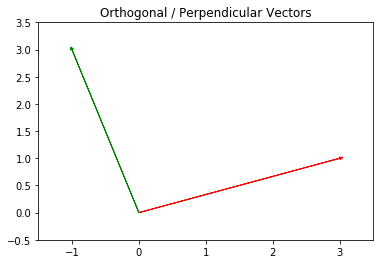

In [42]:
vector_1 = [3, 1]
vector_2 = [-1, 3]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1.5,3.5)          
plt.ylim(-0.5,3.5)
plt.title("Orthogonal / Perpendicular Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [52]:
a = np.array([[-5, 3, 7]])
b = np.array([[6, -8, 2]])

print("Dot product vectors a en b:", (a*b).sum())

Dot product vectors a en b: -40


Conclusion: Vectors a en b are not orthogonal, as their dot product is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([[2, -15, 6, 20]])

In [59]:
print("Norm c squared:", np.linalg.norm(c)**2)
print("Dot product c en c:", (c*c).sum())
print("cTc:", np.matmul(c.T,c))

Norm c squared: 665.0
Dot product c en c: 665
cTc: [[   4  -30   12   40]
 [ -30  225  -90 -300]
 [  12  -90   36  120]
 [  40 -300  120  400]]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [69]:
f = np.array([[4, 12, 11, 9, 2]])
f_norm = np.linalg.norm(f)
print("Norm f:", f_norm)
f_hat = 1/f_norm*f
print("f_hat:", f_hat)
f_hat_norm = np.linalg.norm(f_hat)
print("Check if norm f_hat is 1:", f_hat_norm)

Norm f: 19.131126469708992
f_hat: [[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]]
Check if norm f_hat is 1: 0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
from mpl_toolkits.mplot3d import Axes3D

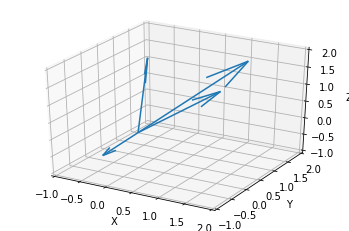

In [82]:
# Vectors s en t are linearly dependent

s = [1.5, 1, 2]
t = [-1/2, -1/3, -2/3]

# Vectors u en v are linearly independent

u = [1, 1, 1]
v = [-1, 2, 1]

vector = np.array([[0, 0, 0, 1.5, 1, 2],
                   [0, 0, 0, -1/2, -1/3, -2/3],
                   [0, 0, 0, 1, 1, 1],
                   [0, 0, 0, -1, 2, 1]])

X, Y, Z, U, V, W = zip(*vector)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 2])
ax.set_zlim([-1, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [84]:
gh = np.array([[1,2],
               [4,8]])
np.linalg.matrix_rank(gh)

1

Conclusion: vectors g and h can't span $\mathbb{R}^2$, only $\mathbb{R}^1$

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [85]:
lmn = np.array([[1,2,3],
               [-1,0,7],
                [4,8,2]])
np.linalg.matrix_rank(lmn)

3

Conclusion: vectors l, m en n span $\mathbb{R}^3$


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



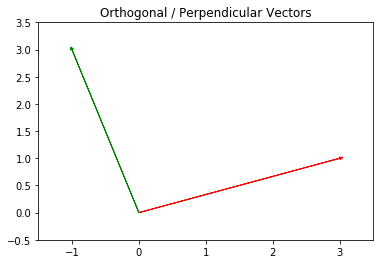

In [86]:
vector_1 = [3, 1]
vector_2 = [-1, 3]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1.5,3.5)          
plt.ylim(-0.5,3.5)
plt.title("Orthogonal / Perpendicular Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

With a (linear) combination of the vectors in 6.1 you can reach any point in x,y-space, i.e. these vectors form a basis for $\mathbb{R}^2$. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [88]:
P = np.array([[1,2,3],
               [-1,0,7],
                [4,8,2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

If a matrix has full rank, like matrix P in 7.1, it means all rows/columns are linearly independent.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [94]:
v = np.array([1,3])
w = np.array([-1,2])

w_dot_v = (w*v).sum()
v_dot_v = (v*v).sum()

w_dot_v/v_dot_v*v

array([0.5, 1.5])

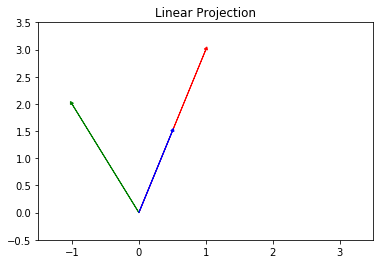

In [95]:
vector_1 = [1, 3]
vector_2 = [-1, 2]
vector_3 = [0.5, 1.5]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, vector_3[0], vector_3[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1.5,3.5)          
plt.ylim(-0.5,3.5)
plt.title("Linear Projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

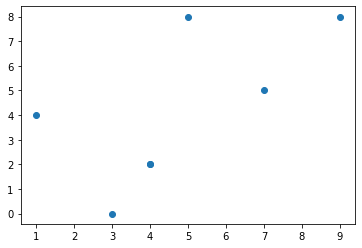

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()